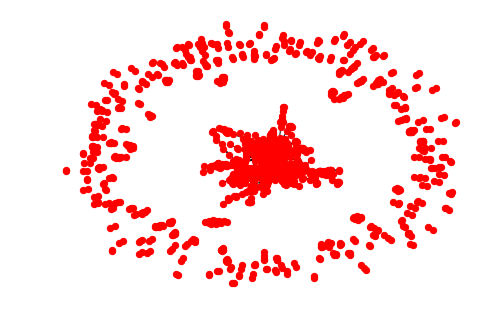

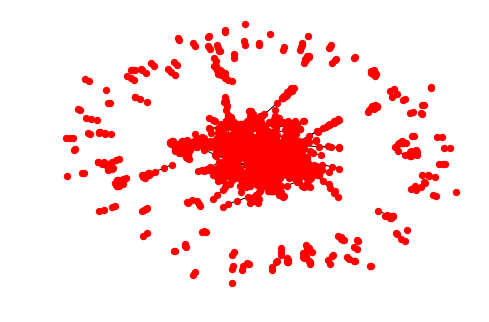

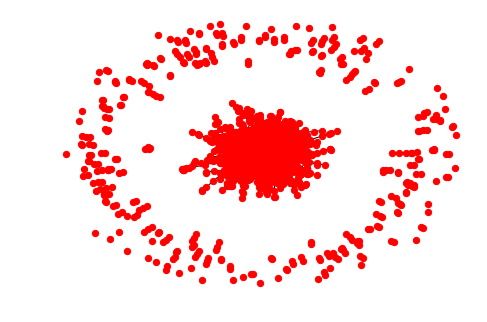

   Redes  Num_Nodos  Num_Enlaces      No-Dirigida  Grado Medio / [Kin,Kout]  \
0  AP_MS       1622         9070  Red no-dirigida                 11.183724   
1    LIT       1536         2925     Red dirigida                  1.904297   
2    Y2H       2018         2930     Red dirigida                  1.451933   

   Kmin   kMAX  Densidad_Red        CΔ      <Ci>  Diámetro  
0   1.0  127.0      0.006899  0.618590  0.554636        15  
1   0.0   35.0      0.002481  0.191083         -        19  
2   0.0   38.0      0.001440  0.108239         -        14  


In [2]:
#EJERCICIO 1
import numpy as np
import matplotlib.pylab as plt
import networkx as nx
import pandas as pd

#'yeast_AP-MS.txt'

def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data
    
#Ej 1.a
def graficar(archive):

    data=ldata(archive)
    g = nx.Graph ()
    
    for i in range (len(data)):
        g.add_nodes_from (data[i])
        g.add_edge (data[i][0],data[i][1])
        
    nx.draw(g,node_size = 40,with_labels=False, font_weight='bold')
    plt.show()

#Ejercicio 1.b

def ej_1b(archive):

    RTA=[]
    data=ldata(archive)
    h=0
    for i in range(len(data)):
        for j in range(len(data)):
            if data[i][0] == data[j][1]:
                if data[i][1] == data[j][0]: #Si al permutar los elementos de la 
                                            #lista, encuentro elementos repetidos,
                    h=h+1                    #entonces la red da importancia a la               
    if h == 0:                     # direccion del enlace, por lo que es dirigida
        
        l='Red no-dirigida' #Primero defino si la red es dirigida para calcular 
        g = nx.Graph ()     #el resto de los ítems
        
        for i in range (len(data)):
            g.add_nodes_from (data[i])
            g.add_edge (data[i][0],data[i][1])
        
        #Número de nodos
        N=g.number_of_nodes()
        
        #Número de enlaces
        L=g.number_of_edges()
        
        #Grado medio de la red
        k=[]
        for node in g.nodes:
            k.append(g.degree(node)) #El comando g.degree() calcula el grado como 
                                    #si la red fuese no-dirigida
        km = sum(k)/len(k)  #valor medio de k  
        kmax=max(k)
        kmin=min(k)
        
        #Densidad de la red
        densidad=2*L/(N*(N-1)) 
        
        #Coeficiente de clustering
        
        Nodo_gnodo_vecino_gvecino_vecinossegundos=[] #Creo una lista con los nodos,  
        for nodo in g.nodes():                      #sus grados, sus vecinos, los 
            v=[]                                    #grados de sus vecinos y sus 
            for vecino in g.neighbors(nodo):        #vecinos segundos
                v2=[]
                for vecino2 in g.neighbors(vecino):
                    v2.append(vecino2)
                gv=len(v2)
                v.append([vecino,gv,v2])
            gn=len(v)
            Nodo_gnodo_vecino_gvecino_vecinossegundos.append([nodo,gn,v])

        #Calculo el numero de tripletes totales en la red
        Tripletes = 0
        for k in Nodo_gnodo_vecino_gvecino_vecinossegundos: #recorro los grados 
            for j in range(1,k[1]):                         #de todos los nodos
                Tripletes = k[1] - j + Tripletes

        #Calculo el numero de triangulos cerrados. La cantidad de triángulos cerrados con vertice en un nodo corresponde 
        #a la cantidad de enlaces entre vecinos de ese nodo
        Triangulos = 0
        for n in Nodo_gnodo_vecino_gvecino_vecinossegundos:
            E = 0
            for i in range(len(n[2])):
                for j in range(len(n[2])):
                    for k in range(len(n[2][i][2])):
                        if n[2][i][2][k] == n[2][j][0]:
                            E = E + 1 #Cuento los enlaces entre vecinos del nodo n
            E = E/2 #Cada enlace se cuenta dos veces
            Triangulos = E + Triangulos

        Ctransitividad = Triangulos/Tripletes

        #Ahora calculo el <Ci>
        t=-1
        C=np.zeros(len(g.nodes()))

        #Calculo la cantidad de enlaces entre vecinos
        for n in Nodo_gnodo_vecino_gvecino_vecinossegundos:
            E = 0
            t=t+1
            for i in range(len(n[2])):
                for j in range(len(n[2])):
                    for k in range(len(n[2][i][2])):
                        if n[2][i][2][k] == n[2][j][0]:
                            E = E + 1 #Cuento los enlaces entre vecinos del nodo n. 
                                      #Haciendo esto, se cuentan dos veces.
            
            if n[1] > 1: #Si el grado es menor o igual a 1, entonces el coeficiente 
                         #de clustering es nulo
                C[t]=E/(n[1]*(n[1]-1)) #Como es una red no dirigida, debería 
                                       #multiplicar por dos, pero ese factor esta 
                                       #contemplado en el numero de enlaces 
                                       #calculados dado que se repiten dos veces

        CPromedio=sum(C)/len(C)

        #Diametro
        #Dado que el grafo tiene nodos sin contectar,
        #busco la componente gigante de la red y 
        #calculo su diametro.
        Gcc = sorted(nx.connected_component_subgraphs(g), key=len, reverse=True)
        g0 = Gcc[0]
        
        D = nx.diameter(g0)
        
        RTA.append([N, L, l, km, kmin, kmax, densidad, Ctransitividad, CPromedio, D])
        
        return RTA
    
    else:
        
        l='Red dirigida'
        
        g = nx.Graph ()
        g = g.to_directed()
        
        for i in range (len(data)):
            g.add_nodes_from (data[i])
            g.add_edge (data[i][0],data[i][1])
        
        #Número de nodos
        N=g.number_of_nodes()
        
        #Número de enlaces
        L=g.number_of_edges()
        
        #Calculo kin y kout
        kin=np.zeros(N)
        kout=np.zeros(N)
        t=-1
        for i in g.nodes:
            t=t+1
            for j in range(len(data)): #Calculo Kin
                if data[j][0] == i:
                    kin[t]=kin[t]+1
            for j in range(len(data)): #Calculo Kout
                if data[j][1] == i:
                    kout[t]=kout[t]+1
        ki=sum(kin)/N 
        ko=sum(kout)/N
        kmax=max(kin)
        kmin=min(kin)
        km = ki #Los valores medios de Kin y Kout son los mismos
        
        #Densidad
        densidad=2*L/(N*(N-1))
        
        #Coeficiente de clustering
        Nodo_gnodo_vecino_gvecino_vecinossegundos=[] #Creo una lista con los nodos, 
        for nodo in g.nodes():                      # sus grados, sus vecinos, los 
            v=[]                                    #grados de sus vecinos y sus 
            for vecino in g.neighbors(nodo):        #vecinos segundos.
                v2=[]
                for vecino2 in g.neighbors(vecino):
                    v2.append(vecino2)
                gv=len(v2)
                v.append([vecino,gv,v2])
            gn=len(v)
            Nodo_gnodo_vecino_gvecino_vecinossegundos.append([nodo,gn,v])

            #Calculo el numero de tripletes totales en la red
            Tripletes = 0
            for k in Nodo_gnodo_vecino_gvecino_vecinossegundos: #recorro los grados 
                for j in range(1,k[1]):                         #de todos los nodos
                    Tripletes = k[1] - j + Tripletes

            #Calculo el numero de triangulos cerrados. La cantidad de triangulos 
            #cerrados con vertice en un nodo corresponde a la cantidad de enlaces 
            #entre vecinos de ese nodo.
            Triangulos = 0
            for n in Nodo_gnodo_vecino_gvecino_vecinossegundos:
                E = 0
                for i in range(len(n[2])):
                    for j in range(len(n[2])):
                        for k in range(len(n[2][i][2])):
                            if n[2][i][2][k] == n[2][j][0]: 
                                E=E+1 #Cuento los enlaces entre vecinos del nodo n
                E = E/2 #Cada enlace se cuenta dos veces
                Triangulos = E + Triangulos

        Ctransitividad = Triangulos/Tripletes
             
         
        #Diametro 
        g2=nx.to_undirected(g)
        #Dado que el grafo tiene nodos sin contectar,
        #busco la componente gigante de la red y 
        #calculo su diametro.
        Gcc = sorted(nx.connected_component_subgraphs(g2), key=len, reverse=True)
        g0 = Gcc[0]
    
        D = nx.diameter(g0)
        
        RTA.append([N, L, l, km, kmin, kmax, densidad, Ctransitividad, "-", D])
        
        return RTA
    
    
graficar('yeast_AP-MS.txt')    
graficar('yeast_LIT.txt')
graficar('yeast_Y2H.txt')


AP = ej_1b('yeast_AP-MS.txt')
LIT = ej_1b('yeast_LIT.txt')
Y2H = ej_1b('yeast_Y2H.txt')

#TABLA
tabla_red = pd.DataFrame ({"Redes":["AP_MS","LIT","Y2H"],
                             "Num_Nodos":[AP[0][0],LIT[0][0],Y2H[0][0]],
                             "Num_Enlaces":[AP[0][1],LIT[0][1],Y2H[0][1]],
                             "No-Dirigida":[AP[0][2],LIT[0][2],Y2H[0][2]],
                             "Grado Medio / [Kin,Kout]":[AP[0][3],LIT[0][3],Y2H[0][3]],
                             "Kmin":[AP[0][4],LIT[0][4],Y2H[0][4]],
                             "kMAX":[AP[0][5],LIT[0][5],Y2H[0][5]],
                             "Densidad_Red":[AP[0][6],LIT[0][6],Y2H[0][6]],
                            "CΔ":[AP[0][7],LIT[0][7],Y2H[0][7]],
                           "<Ci>":[AP[0][8],LIT[0][8],Y2H[0][8]],
                           "Diámetro":[AP[0][9],LIT[0][9],Y2H[0][9]]
                          })
print (tabla_red)

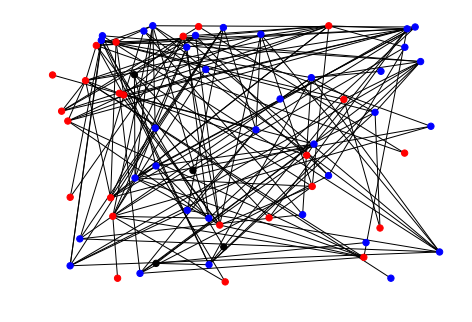

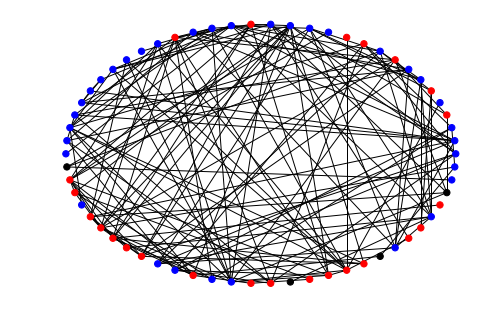

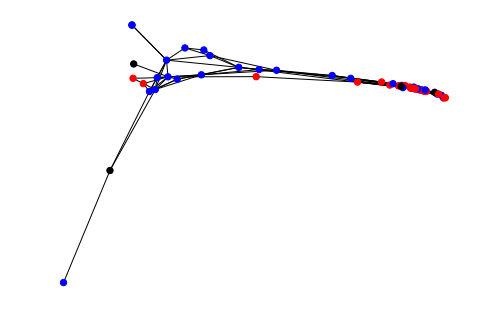

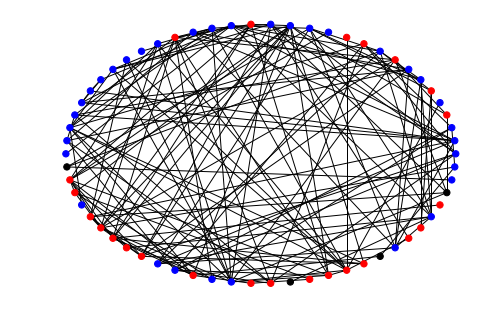

[74, 72, 61, 81, 63, 61, 70, 65, 68, 69, 81, 72, 70, 70, 60, 62, 68, 66, 78, 79, 68, 66, 71, 75, 74, 75, 64, 77, 71, 76, 63, 55, 61, 72, 72, 55, 68, 81, 73, 80, 74, 66, 72, 78, 85, 64, 76, 76, 62, 76, 66, 67, 64, 75, 74, 75, 65, 75, 72, 77, 69, 69, 77, 73, 67, 59, 66, 67, 75, 77, 72, 73, 76, 77, 69, 74, 68, 76, 64, 62, 66, 80, 68, 66, 63, 77, 68, 72, 73, 72, 66, 79, 69, 72, 79, 71, 64, 74, 76, 79, 71, 72, 66, 88, 71, 81, 67, 81, 77, 70, 63, 61, 75, 64, 68, 73, 79, 69, 74, 65, 63, 65, 76, 78, 68, 77, 79, 85, 71, 82, 77, 77, 64, 71, 69, 71, 75, 69, 78, 72, 73, 55, 72, 74, 74, 64, 68, 82, 71, 64, 75, 73, 64, 69, 69, 75, 65, 63, 77, 60, 72, 71, 68, 78, 74, 69, 71, 68, 69, 62, 69, 66, 65, 77, 70, 68, 66, 62, 70, 77, 72, 61, 77, 67, 63, 66, 76, 67, 73, 69, 68, 68, 75, 65, 76, 74, 77, 59, 86, 65, 72, 69, 67, 70, 74, 66, 73, 80, 65, 79, 63, 68, 64, 62, 59, 72, 71, 68, 68, 62, 67, 63, 73, 75, 69, 75, 70, 68, 57, 92, 67, 71, 70, 66, 72, 72, 72, 81, 72, 80, 73, 89, 82, 70, 78, 73, 69, 70, 62, 76,

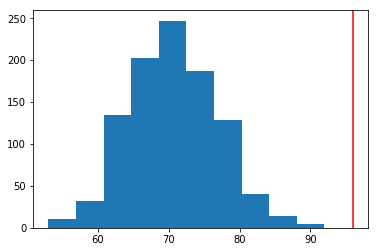

[1, 0, 1, 5, 2, 3, 0, 0, 2, 2, 3, 1, 3, 1, 2, 0, 6, 2, 2, 0, 1, 0, 2, 3, 3, 1, 0, 3, 1, 1, 0, 1, 0, 1, 1, 1, 2, 0, 2, 0, 2, 0, 1, 6, 4, 5, 0, 3, 3, 3, 2, 1, 4, 2, 0, 0, 0, 0, 0, 1, 0, 0]
96
70.618
0
0.0


In [31]:
#EJERCICIO 2
import networkx as nx
import pandas as pd 
import matplotlib.pylab as plt
import numpy as np 
import random as rm 

#2.A
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

g = nx.read_gml('dolphins.gml')  #lee el gml

delfines_generos = ldata ("dolphinsGender.txt")


   
for d in delfines_generos: #asigno genero a cada delfin
    g.nodes[d[0]]["genero"]=d[1]

nx.draw_random(g, node_color=["blue" if genero=="m" else "red" if genero=="f" else "black" for genero in nx.get_node_attributes(g, "genero").values()], node_size = 40,with_labels=False, font_weight='bold')
#Asignar colores pos, cmap=plt.get_cmap('plasma'), node_color=list(dict(g.degree).values()),
plt.show()

nx.draw_circular(g, node_color=["blue" if genero=="m" else "red" if genero=="f" else "black" for genero in nx.get_node_attributes(g, "genero").values()], node_size = 40,with_labels=False, font_weight='bold')
plt.show()

nx.draw_spectral(g, node_color=["blue" if genero=="m" else "red" if genero=="f" else "black" for genero in nx.get_node_attributes(g, "genero").values()], node_size = 40,with_labels=False, font_weight='bold')
plt.show()

nx.draw_shell(g, node_color=["blue" if genero=="m" else "red" if genero=="f" else "black" for genero in nx.get_node_attributes(g, "genero").values()], node_size = 40,with_labels=False, font_weight='bold')
plt.show()

#2.B
#Resolución punto 2.b.I 
g = nx.read_gml('dolphins.gml')  #lee el gml 

#SEPARO LOS NOMBRES DE LOS DELFINES + GENEROS EN DOS LISTAS DISTINTAS 
delfines_generos = ldata ("dolphinsGender.txt") 
delfines = [] 
generos = [] 

for i in range (len(delfines_generos)): 
    delfines.append(delfines_generos[i][0]) 
    generos.append(delfines_generos[i][1]) 

generos_aleatorio = generos 

#CON ESTO ASIGNO ALEATORIAMENTE LOS GENEROS. 
rm.shuffle(generos_aleatorio) 

#Armo una lista que contenga el nombre de los delfines que está unido con cada delfín. Por ejemplo, el primer elemento de dicha lista contendrá los delfines unidos al primer delfín del grafo. 

list_union = [] 

for i in range (len(delfines)): 
    uniones = [] 
    for nodo in g.neighbors(delfines[i]): 
        uniones.append(nodo) 
    list_union.append (uniones) 

N_enlaces_homofilicos_totales = []#Contendrá el número de enlaces entre delfines del mismo género por cada distribución de géneros al azar. 

for j in range (1000): 
    rm.shuffle (generos_aleatorio) #MEZCLA LOS ELEMENTOS DENTRO DE LA LISTA Y DICHA LISTA QUEDA DEFINIDA CON LOS ELEMENTOS MEZCLADOS 
    enlaces_homofilicos_por_vuelta = 0 
    delfines_ya_recorridos = [] 

    for i in range (len(list_union)):#OBTENGO UNA LISTA CON LAS UNIONES DE CADA DELFIN POR SEPARADO 
        delfines_ya_recorridos.append(delfines[i]) #CON ESTO REGISTRO LOS DELFINES CUYOS ENLACES YA VI // PARA NO VOLVER A CONTARLOS 
        contador = 0 
        union_delfin_i = list_union [i] 
        pos_en_delfines_de_las_uniones = [] #Esta lista contendrá el índice que me indica la posición en la lista "DELFINES" de los delfines con los que estoy unido. 

        for l in range (len(union_delfin_i)): #LLENO LA LISTA pos_en_... 
            index_delfines = delfines.index(union_delfin_i[l]) #ME DA EL INDICE DE LA LISTA DELFINES DEL DELFIN AL CUAL ESTOY UNIDO. 
            pos_en_delfines_de_las_uniones.append (index_delfines) 

        for m in range (len(pos_en_delfines_de_las_uniones)): 
            if generos_aleatorio[i] == generos_aleatorio [pos_en_delfines_de_las_uniones[m]] and not union_delfin_i [m] in delfines_ya_recorridos: #VEO SI EL GENERO DEL DELFIN QUE ESTOY VIENDO SE COMPARTE CON EL DE LOS DELFINES UNIDOS A MI Y CON LA SEGUNDA PARTE EVITO CONTAR DOS VECES EL MISMO ENLACE 
                contador = contador + 1 #ENLACES HOMOFILICOS POR DELFIN 
        enlaces_homofilicos_por_vuelta = enlaces_homofilicos_por_vuelta + contador 
    N_enlaces_homofilicos_totales.append(enlaces_homofilicos_por_vuelta) 

print (N_enlaces_homofilicos_totales) 

x_array = np.asarray(N_enlaces_homofilicos_totales) 

plt.hist (x_array) 

#Incisos 2.B.II y 2.B.III //  

#CONTAR ENLACES HOMOFILICOS EN LA DISTRIBUCION DE GENEROS INICIAL Y #COMPARAR CON HISTOGRAMA. 
#CUENTO EL NUMERO DE ENLACES HOMOFILICOS DE LA RED CON LA DISTRIBUCIÓN DE GENEROS INICIAL. 

delfines_generos = ldata ("dolphinsGender.txt") 
delfines_2 = [] 
generos_2 = [] 

for i in range (len(delfines_generos)): 
    delfines_2.append(delfines_generos[i][0]) 
    generos_2.append(delfines_generos[i][1]) 

N_enlaces_homofilicos_totales_real = [] 

delfines_ya_recorridos_2 = [] 

for i in range (len(list_union)): 
    delfines_ya_recorridos_2.append(delfines_2[i])  
    contador = 0 
    union_delfin_i = list_union [i] 
    pos_en_delfines_de_las_uniones = []  

    for l in range (len(union_delfin_i)):  
        index_delfines = delfines_2.index(union_delfin_i[l]) 
        pos_en_delfines_de_las_uniones.append (index_delfines) 

    for m in range (len(pos_en_delfines_de_las_uniones)): 
        if generos_2[i] == generos_2 [pos_en_delfines_de_las_uniones[m]] and not union_delfin_i [m] in delfines_ya_recorridos_2 : 
            contador = contador + 1  
    N_enlaces_homofilicos_totales_real.append(contador) 

e_real = sum (N_enlaces_homofilicos_totales_real) 

plt.axvline(e_real, c="red")#vertical lines
plt.show () 

print (N_enlaces_homofilicos_totales_real) 
print (e_real) 

#BUSCO EL VALOR MEDIO DE LA DISTRIBUCION DE GENEROS AL AZAR. 
val_medio_1000repes = np.mean (N_enlaces_homofilicos_totales) 

print (val_medio_1000repes) 

#Luego de haber obtenido el número de enlaces homofílicos de la distribución de géneros inicial (e_real), y tener una lista del mismo número pero de una distribución de géneros al azar (N_enlaces_homofilicos_totales), realizada 1000 veces, se compara cuan probable es el valor e_real si la distribución de géneros fuera al azar. Para ello se cuenta la cantidad de veces que el valor de enlaces homofílicos fue mayor que e_real. 

contador_nuevo = 0 

for m in range (len(N_enlaces_homofilicos_totales)): 
    if N_enlaces_homofilicos_totales[m] >= 96: 
        contador_nuevo = contador_nuevo + 1 

print (contador_nuevo) 

proba_distribucion_real = contador_nuevo / len(N_enlaces_homofilicos_totales) 

print (proba_distribucion_real) 

#Dicha cuenta da por resultado = 0.0 y como dicho valor es menor que 0.05 concluimos que la hipótesis de que la distribución de géneros se dio al azar es falsa. 

#Resulta poco probable obtener enlaces homofilicos al azar con un valor de 96, cuando la media del histograma es 71.

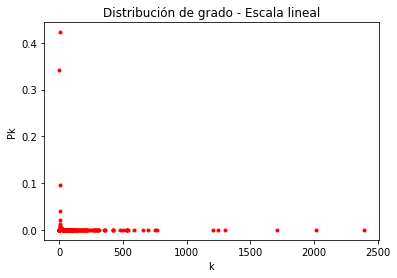

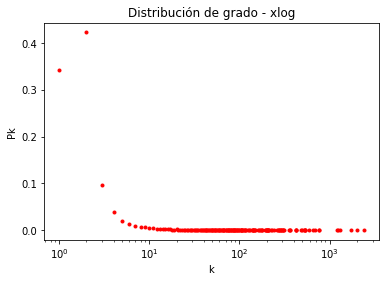

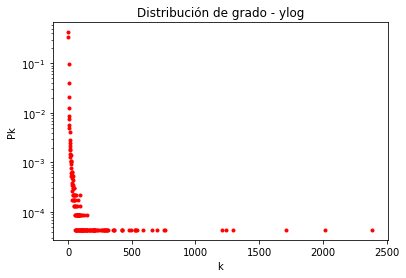

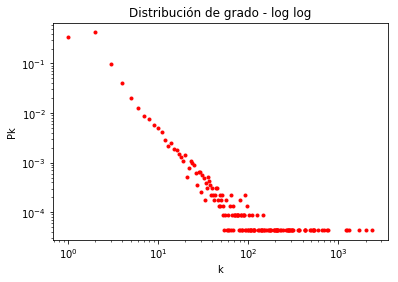

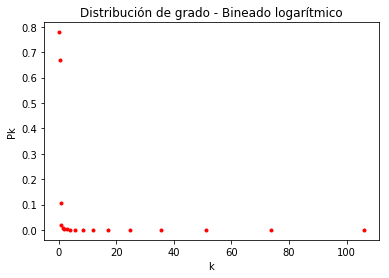

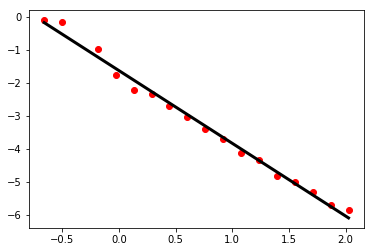

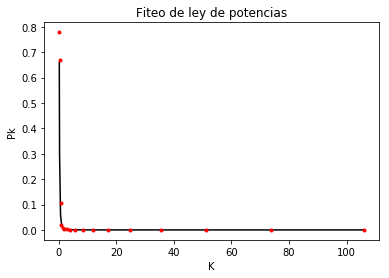

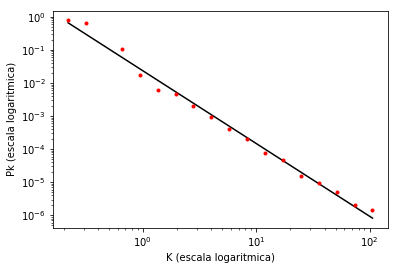

In [29]:
#EJERCICIO 3
import numpy as np
import matplotlib.pylab as plt
import networkx as nx
import pandas as pd
from scipy import optimize

g = nx.read_gml('as-22july06.gml')

#3.A
#Creo lista de nodos
nodos=[] 
for nodo in g.nodes:
    nodos.append(nodo)

#Creo lista con vecinos correspondientes a cada nodo
vecinos_de_nodos=[]
for nodo in g.nodes:
    vecinos=[]
    for vecino in g.neighbors(nodo):
        vecinos.append(vecino)
    vecinos_de_nodos.append(vecinos)

#Calculo el grado de cada nodo y hago una lista [nodo,grado]
nodo_grado=[]
grados_existentes=[]
for n,i in zip(nodos,vecinos_de_nodos):
    l=len(i)                            #la longitud de la sublista i de vecinos_de_nodos
    nodo_grado.append([n,l])            #es el grado del nodo correspondiente a esos vecinos
    grados_existentes.append(l)

#Hago una lista de los grados existentes
grados_existentes=list(set(grados_existentes))

#Hago una lista con el grado y el numero de nodos con dicho grado
grado_nronodos=[]
NroNodos=[]
for grado in grados_existentes:
    nronodos=[]
    for i in nodo_grado:
        if i[1]==grado:
            nronodos.append(i[0])
    Pk=len(nronodos)
    NroNodos.append(Pk)
    
for g,n in zip(grados_existentes,NroNodos):
    grado_nronodos.append([g,n])
    
#Creo vectores de grado y de probabilidad de grado Pk=N_i/N
M=len(NroNodos)
N=len(nodos)
K=np.zeros(N)
Pk=np.zeros(N)
t=-1
for i in range(M):
    t=t+1
    K[t]=grado_nronodos[i][0]
    Pk[t]=grado_nronodos[i][1]/N
    
#GRAFICO
plt.plot(K, Pk, 'r.')
plt.xlabel("k")
plt.ylabel("Pk")
plt.title("Distribución de grado - Escala lineal")
plt.show()

plt.plot(K, Pk, 'r.')
plt.xlabel("k")
plt.ylabel("Pk")
plt.xscale('log')
plt.title("Distribución de grado - xlog")
plt.show()


plt.plot(K, Pk, 'r.')
plt.xlabel("k")
plt.ylabel("Pk")
plt.yscale('log')
plt.title("Distribución de grado - ylog")
plt.show()


plt.plot(K, Pk, 'r.')
plt.xlabel("k")
plt.ylabel("Pk")
plt.xscale('log')
plt.yscale('log')
plt.title("Distribución de grado - log log")
plt.show()
    
#BINEADO LOGARITMICO
#Creo al vector Kn con los grados correspondientes a cada nodo
Kn=np.zeros(len(nodo_grado))
t=-1
for i in range(len(nodo_grado)):
    t=t+1
    Kn[t]=nodo_grado[i][1]

# bins escalados logaritmicamente
bins = np.logspace(0, 3, 20)
widths = (bins[1:] - bins[:-1])

# Calculo histograma
hist = np.histogram(Kn, bins=bins)
# normalizo el ancho del bin
hist_norm = hist[0]/widths

kb=np.zeros(len(bins))
Pkm=np.zeros(len(bins))
for i in range(len(bins)-1):
    kb[i]=(bins[i+1]-bins[i])/2
    Pkm[i]=hist_norm[i]
    
#3.B
kb=np.zeros(len(bins))
Pkm=np.zeros(len(bins))
for i in range(len(bins)-1):
    kb[i]=(bins[i+1]-bins[i])/2
    Pkm[i]=hist_norm[i]/N    

#Me deshago de los puntos que tienen ceros
t=-1
i=0
for i in range(len(kb)):
    if Pkm[i]>0:
        t=t+1
        kb[t]=kb[i]
        Pkm[t]=Pkm[i]
kbb=np.zeros(t)
Pkmm=np.zeros(t)
for i in range(t):
    kbb[i]=kb[i]
    Pkmm[i]=Pkm[i]
    
plt.plot(kbb,Pkmm,'r.')
plt.xlabel("k")
plt.ylabel("Pk")
plt.title("Distribución de grado - Bineado logarítmico")
plt.show()

logkb=np.log10(kbb)
logPkm=np.log10(Pkmm)
#-------------------------------------------------------------------------------------------------------------------------------
# Define function for calculating a power law
powerlaw = lambda x, amp, index: amp * (x**index)

fitfunc = lambda p, logkb: p[0]*logkb+p[1] # Funcion con la que queremos fitear la data
p0 = [-2, 4] # Parametros iniciales para fitear
errfunc = lambda p, logkb, logPkm: fitfunc(p, logkb) - logPkm # Distancia a la función objetivo
p1, success = optimize.leastsq(errfunc, p0[:], args=(logkb, logPkm))
plt.plot(logkb, logPkm, "ro", logkb, fitfunc(p1, logkb), "k-", linewidth=3) # Plot of the data and
plt.show()
index = p1[0]
amp = 10**p1[1]

plt.plot(kbb, powerlaw(kbb, amp, index),'k')     # Fit
plt.plot(kbb, Pkmm, 'r.')  # Data
plt.title('Fiteo de ley de potencias')
plt.xlabel('K')
plt.ylabel('Pk')
plt.show()

plt.loglog(kbb, powerlaw(kbb, amp, index),'k')
plt.plot(kbb, Pkmm, 'r.')  # Data
plt.xlabel('K (escala logaritmica)')
plt.ylabel('Pk (escala logaritmica)')
plt.show()

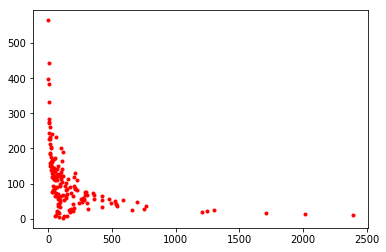

[-0.44417355  6.32762497]


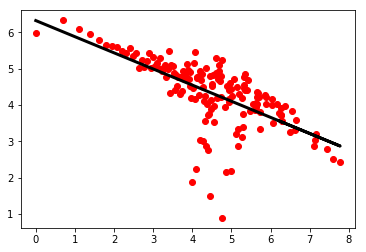

-0.19838487512056477

In [27]:
#EJERCICIO 4.A 
#JULY
import networkx as nx
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import random as rm
from scipy import optimize

july = nx.read_gml("as-22july06.gml")

#--------------------------------------------------------------------------------------------------------------------------------
def ej_4(grafo):
    #ARMO UNA LISTA DE LOS NODOS.
    grafo_nodos = grafo.nodes()
    grafo_nodos_lista = list(grafo_nodos) #ESTO TRANSFORMA A LISTA CUALQUIER VARIABLE. ACA TENGO LOS NODOS.

#VEO LAS UNIONES DE ESOS NODOS.
    uniones = []
    for i in range (len(grafo_nodos_lista)):
        union = []
        for nodo in grafo.neighbors(grafo_nodos_lista[i]):
            union.append(nodo)
        uniones.append(union)
#VEO EL GRADO DE CADA NODO.
    grados_por_nodo = []
    for l in range (len(grafo_nodos_lista)):
        grado_nodo_l = grafo.degree(grafo_nodos_lista[l])
        grados_por_nodo.append(grado_nodo_l)

#VEO EL GRADO DE MIS VECINOS.
    grados_vecino_por_nodo = []
    for l in range (len(uniones)):
        grados_nodos_vecinos = []
        for m in range (len(uniones[l])):
            grado_nodo_m = grafo.degree(uniones[l][m])
            grados_nodos_vecinos.append(grado_nodo_m)
        grados_vecino_por_nodo.append(grados_nodos_vecinos)
        
    #CALCULO VALOR MEDIO DE LOS VECINOS DE NODOS DE GRADO K.
    promedio_vecinos = []
    for i in grados_vecino_por_nodo:
        if len(i) == 0:
            promedio_vecinos.append(0)
        else:
            val_medio_por_vecinos = sum(i)/len(i)
            promedio_vecinos.append(val_medio_por_vecinos)

    nombre_gnodo_gvecinos = []
    for n,g,v in zip(grafo_nodos_lista,grados_por_nodo,promedio_vecinos):
        nombre_gnodo_gvecinos.append([n,g,v])

    gnodo_vmedio_vecinos = []
    grados = list(set(grados_por_nodo))
    for grado in grados:
        m = []
        for i in nombre_gnodo_gvecinos:
            if i[1] == grado:
                 m.append(i[2])
        m_valmedio = np.mean (m)
        gnodo_vmedio_vecinos.append([grado,m_valmedio])

    x = np.zeros (len(gnodo_vmedio_vecinos))
    y = np.zeros (len(gnodo_vmedio_vecinos))
    for i in range (len(gnodo_vmedio_vecinos)):
        x[i] = gnodo_vmedio_vecinos[i][0]
        y[i] = gnodo_vmedio_vecinos[i][1]

    
    plt.plot(x,y,'r.')
    plt.show()
    
    x_log = np.log (x)
    y_log = np.log (y)
    
    #CON ESTO ARMO LA FUNCION QUE FITEA LOS DATOS LOGARITMICOS.
    fitfunc = lambda p, x_log: p[0]*x_log+p[1]
    p0 = [0.5, 1]

    errfunc = lambda p, x_log, y_log: fitfunc(p, x_log) - y_log
    p1, suc = optimize.leastsq(errfunc, p0[:], args=(x_log, y_log)) #EL P1 TIENE LOS ELEMENTOS DE MI FITEO. los parametros de mi lineal.
    plt.plot(x_log, y_log, "ro", x_log, fitfunc(p1, x_log), "k-", linewidth=3)
    print (p1)

    #plt.plot (np.log(x),np.log(y),"r.")

    plt.show ()
    
    #CALCULO ASORTATIVIDAD
    S1=sum(grados_por_nodo)
   
    S2=0
    for grado in grados_por_nodo:
        S2 = S2 + grado**2
    
    Se = 0
    for i,j in zip(nombre_gnodo_gvecinos,uniones):
        ki = i[1]
        for h in range(len(j)):
            kj=grafo.degree(j[h])
            Se = Se + ki*kj
            
    S3 = 0
    for grado in grados_por_nodo:
        S3 = S3 + grado**3
        
    r = (S1*Se-S2**2)/(S1*S3-S2**2) #ASORTATIVIDAD
    
    return r

ej_4(july)

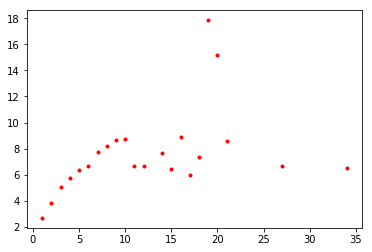

[0.30611665 1.26886805]


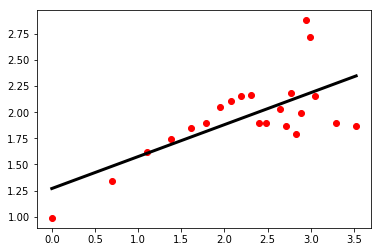

0.4616224667525835

In [26]:
#EJERCICIO 4.A 
#SCIENCE
import networkx as nx
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import random as rm
from scipy import optimize

science = nx.read_gml("netscience.gml")

#--------------------------------------------------------------------------------------------------------------------------------
def ej_4(grafo):
    #ARMO UNA LISTA DE LOS NODOS.
    grafo_nodos = grafo.nodes()
    grafo_nodos_lista = list(grafo_nodos) #ESTO TRANSFORMA A LISTA CUALQUIER VARIABLE. ACA TENGO LOS NODOS.

#VEO LAS UNIONES DE ESOS NODOS.
    uniones = []
    for i in range (len(grafo_nodos_lista)):
        union = []
        for nodo in grafo.neighbors(grafo_nodos_lista[i]):
            union.append(nodo)
        uniones.append(union)
#VEO EL GRADO DE CADA NODO.
    grados_por_nodo = []
    for l in range (len(grafo_nodos_lista)):
        grado_nodo_l = grafo.degree(grafo_nodos_lista[l])
        grados_por_nodo.append(grado_nodo_l)

#VEO EL GRADO DE MIS VECINOS.
    grados_vecino_por_nodo = []
    for l in range (len(uniones)):
        grados_nodos_vecinos = []
        for m in range (len(uniones[l])):
            grado_nodo_m = grafo.degree(uniones[l][m])
            grados_nodos_vecinos.append(grado_nodo_m)
        grados_vecino_por_nodo.append(grados_nodos_vecinos)
        
    #CALCULO VALOR MEDIO DE LOS VECINOS DE NODOS DE GRADO K.
    promedio_vecinos = []
    for i in grados_vecino_por_nodo:
        if len(i) == 0:
            promedio_vecinos.append(0)
        else:
            val_medio_por_vecinos = sum(i)/len(i)
            promedio_vecinos.append(val_medio_por_vecinos)

    nombre_gnodo_gvecinos = []
    for n,g,v in zip(grafo_nodos_lista,grados_por_nodo,promedio_vecinos):
        nombre_gnodo_gvecinos.append([n,g,v])

    gnodo_vmedio_vecinos = []
    grados = list(set(grados_por_nodo))
    for grado in grados:
        m = []
        for i in nombre_gnodo_gvecinos:
            if i[1] == grado:
                 m.append(i[2])
        m_valmedio = np.mean (m)
        gnodo_vmedio_vecinos.append([grado,m_valmedio])
    
    x = np.zeros (len(gnodo_vmedio_vecinos)-1)
    y = np.zeros (len(gnodo_vmedio_vecinos)-1)
    for i in range (1,len(gnodo_vmedio_vecinos)):
        x[i-1] = gnodo_vmedio_vecinos[i][0]
        y[i-1] = gnodo_vmedio_vecinos[i][1]
        
    plt.plot(x,y,'r.')
    plt.show()
    
    x_log = np.log (x)
    y_log = np.log (y)
    
    #CON ESTO ARMO LA FUNCION QUE FITEA LOS DATOS LOGARITMICOS.
    fitfunc = lambda p, x_log: p[0]*x_log+p[1]
    p0 = [0.5, 1]

    errfunc = lambda p, x_log, y_log: fitfunc(p, x_log) - y_log
    p1, suc = optimize.leastsq(errfunc, p0[:], args=(x_log, y_log)) #EL P1 TIENE LOS ELEMENTOS DE MI FITEO. los parametros de mi lineal.
    plt.plot(x_log, y_log, "ro", x_log, fitfunc(p1, x_log), "k-", linewidth=3)
    print (p1)

    #plt.plot (np.log(x),np.log(y),"r.")

    plt.show ()
    
    #CALCULO ASORTATIVIDAD
    S1=sum(grados_por_nodo)
   
    S2=0
    for grado in grados_por_nodo:
        S2 = S2 + grado**2
    
    Se = 0
    for i,j in zip(nombre_gnodo_gvecinos,uniones):
        ki = i[1]
        for h in range(len(j)):
            kj=grafo.degree(j[h])
            Se = Se + ki*kj
            
    S3 = 0
    for grado in grados_por_nodo:
        S3 = S3 + grado**3
        
    r = (S1*Se-S2**2)/(S1*S3-S2**2) #ASORTATIVIDAD
    
    return r

ej_4(science)

[0.59928924 1.51258712]


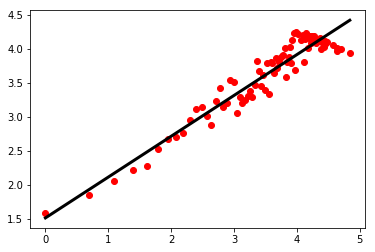

[-0.17757987  2.7520941 ]


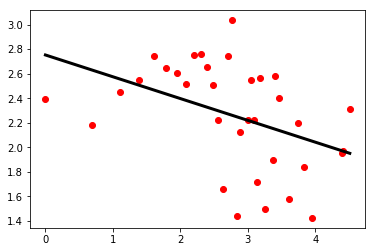

In [28]:
#4.B
import networkx as nx
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import random as rm
from scipy import optimize


def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

#--------------------------------------------------------------------------------------------------------------------------------
def ej_4b(archive):
    
    data = ldata(archive)
    grafo = nx.Graph ()
    
    for i in range (len(data)):
        grafo.add_nodes_from (data[i])
        grafo.add_edge (data[i][0],data[i][1])
    
    #ARMO UNA LISTA DE LOS NODOS.
    grafo_nodos = grafo.nodes()
    grafo_nodos_lista = list(grafo_nodos) #ESTO TRANSFORMA A LISTA CUALQUIER VARIABLE. ACA TENGO LOS NODOS.

#VEO LAS UNIONES DE ESOS NODOS.
    uniones = []
    for i in range (len(grafo_nodos_lista)):
        union = []
        for nodo in grafo.neighbors(grafo_nodos_lista[i]):
            union.append(nodo)
        uniones.append(union)
#VEO EL GRADO DE CADA NODO.
    grados_por_nodo = []
    for l in range (len(grafo_nodos_lista)):
        grado_nodo_l = grafo.degree(grafo_nodos_lista[l])
        grados_por_nodo.append(grado_nodo_l)

#VEO EL GRADO DE MIS VECINOS.
    grados_vecino_por_nodo = []
    for l in range (len(uniones)):
        grados_nodos_vecinos = []
        for m in range (len(uniones[l])):
            grado_nodo_m = grafo.degree(uniones[l][m])
            grados_nodos_vecinos.append(grado_nodo_m)
        grados_vecino_por_nodo.append(grados_nodos_vecinos)

#CALCULO VALOR MEDIO DE LOS VECINOS DE NODOS DE GRADO K.
    promedio_vecinos = []
    for i in grados_vecino_por_nodo:
        val_medio_por_vecinos = np.mean (i)
        promedio_vecinos.append (val_medio_por_vecinos)

    nombre_gnodo_gvecinos = []
    for n,g,v in zip(grafo_nodos_lista,grados_por_nodo,promedio_vecinos):
        nombre_gnodo_gvecinos.append([n,g,v])

    gnodo_vmedio_vecinos = []
    grados = list(set(grados_por_nodo))
    for grado in grados:
        m = []
        for i in nombre_gnodo_gvecinos:
            if i[1] == grado:
                 m.append(i[2])
        m_valmedio = np.mean (m)
        gnodo_vmedio_vecinos.append([grado,m_valmedio])

    x = np.zeros (len(gnodo_vmedio_vecinos))
    y = np.zeros (len(gnodo_vmedio_vecinos))
    for i in range (len(gnodo_vmedio_vecinos)):
        x[i] = gnodo_vmedio_vecinos[i][0]
        y[i] = gnodo_vmedio_vecinos[i][1]

    x_log = np.log (x)
    y_log = np.log (y)

    #CON ESTO ARMO LA FUNCION QUE FITEA LOS DATOS LOGARITMICOS.
    fitfunc = lambda p, x_log: p[0]*x_log+p[1]
    p0 = [1, 1]

    errfunc = lambda p, x_log, y_log: fitfunc(p, x_log) - y_log
    p1, suc = optimize.leastsq(errfunc, p0[:], args=(x_log, y_log)) #EL P1 TIENE LOS ELEMENTOS DE MI FITEO. los parametros de mi lineal.
    plt.plot(x_log, y_log, "ro", x_log, fitfunc(p1, x_log), "k-", linewidth=3)
    print (p1)

    #plt.plot (np.log(x),np.log(y),"r.")

    plt.show ()
#----------------------------------------------------------------------------------------------------------------------------------

ej_4b('yeast_AP-MS.txt')

ej_4b('yeast_Y2H.txt')
